In [1]:
#Importing required libraries
import pandas as pd #for data preprocessing

#Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt



#Linear Algebra
import numpy as np
 
#Import Datetime module
from datetime import datetime, timedelta

from sklearn.model_selection import train_test_split #For splitting

#Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,classification_report

#To ignore unnecessary warnings
import warnings

# for encoding categorical variables
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor, CatBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgb

In [2]:
# Showing all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
#Reading the provided data sets

train = pd.read_csv('ai_bootcamp_train.csv')
test = pd.read_csv('ai_bootcamp_test.csv')


In [4]:
# Displaying the first 5 rows in the dataframe
train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


In [5]:
# Checking for more informations about the individual features such as missing values, dtypes etc
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [6]:
#Checking for null values in the train dataset
train.isnull().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [7]:
#Checking for null values in the test dataset
test.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [8]:
#Check for dtypes in train
train.dtypes

ID                          object
Year_of_Birth                int64
Education_Level             object
Marital_Status              object
Disposable_Income          float64
No_of_Kids_in_home           int64
No_of_Teen_in_home           int64
Date_Customer               object
Recency                      int64
Discounted_Purchases         int64
WebPurchases                 int64
CatalogPurchases             int64
StorePurchases               int64
Amount_on_Wines              int64
Amount_on_Fruits             int64
Amount_on_MeatProducts       int64
Amount_on_FishProducts       int64
Amount_on_SweetProducts      int64
Amount_on_GoldProds          int64
WebVisitsMonth               int64
Cmp3Accepted                 int64
Cmp4Accepted                 int64
Cmp5Accepted                 int64
Cmp1Accepted                 int64
Cmp2Accepted                 int64
Any_Complain                 int64
Response                     int64
dtype: object

In [9]:
#Check for dtypes in test
test.dtypes

ID                          object
Year_of_Birth                int64
Education_Level             object
Marital_Status              object
Disposable_Income          float64
No_of_Kids_in_home           int64
No_of_Teen_in_home           int64
Date_Customer               object
Recency                      int64
Discounted_Purchases         int64
WebPurchases                 int64
CatalogPurchases             int64
StorePurchases               int64
Amount_on_Wines              int64
Amount_on_Fruits             int64
Amount_on_MeatProducts       int64
Amount_on_FishProducts       int64
Amount_on_SweetProducts      int64
Amount_on_GoldProds          int64
WebVisitsMonth               int64
Cmp3Accepted                 int64
Cmp4Accepted                 int64
Cmp5Accepted                 int64
Cmp1Accepted                 int64
Cmp2Accepted                 int64
Any_Complain                 int64
dtype: object

In [10]:
#Drop ID from train
train.drop('ID', axis=1, inplace=True)

In [11]:
#Convert Datetime
train['Date_Customer'] = pd.to_datetime(train['Date_Customer'])
test['Date_Customer'] = pd.to_datetime(test['Date_Customer'])

In [12]:
# We can separate catgorical and numerical column
#categ_cols == categorical columns . Date column excluded
categ_cols = train.select_dtypes(include=['object', 'category']).columns

# num column == numerical columns + date column included
num_cols = [col for col in train.columns if col not in categ_cols]
print(f'The Categorical Columns are: {categ_cols}')
print(f'The Numerical Columns are: {num_cols}')

The Categorical Columns are: Index(['Education_Level', 'Marital_Status'], dtype='object')
The Numerical Columns are: ['Year_of_Birth', 'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home', 'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts', 'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth', 'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted', 'Cmp2Accepted', 'Any_Complain', 'Response']


In [13]:
for col in categ_cols:
    print(f'Unique entries in the {col} column in the train set is: {train[col].nunique()}')
    print(f'and the unique entries are: {train[col].unique()}')

Unique entries in the Education_Level column in the train set is: 5
and the unique entries are: ['Graduation' '2n Cycle' 'Master' 'PhD' 'Basic']
Unique entries in the Marital_Status column in the train set is: 8
and the unique entries are: ['Divorced' 'Together' 'Single' 'Married' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [14]:
for col in categ_cols:
    print(f'Unique entries in the {col} column in the test set is: {test[col].nunique()}')
    print(f'and the unique entries are: {test[col].unique()}')

Unique entries in the Education_Level column in the test set is: 5
and the unique entries are: ['Graduation' 'Basic' 'Master' '2n Cycle' 'PhD']
Unique entries in the Marital_Status column in the test set is: 6
and the unique entries are: ['Single' 'Widow' 'Married' 'Together' 'Divorced' 'Absurd']


In [15]:
print(f'Unique entries in the Target column in  is: {train.Response.nunique()}')
print(f'and the unique entries are: {train.Response.unique()}')

Unique entries in the Target column in  is: 2
and the unique entries are: [0 1]


<AxesSubplot:>

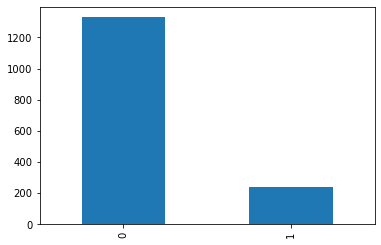

In [16]:
train.Response.value_counts().plot(kind='bar')

In [17]:
train['Response'].value_counts()

0    1329
1     239
Name: Response, dtype: int64

### looking at the Response barplot above and the value counts, this shows that the data set is an imbalance data set

In [18]:
train.fillna((train.median()) , inplace = True)
#check again to make sure
train.isnull().sum()

<ipython-input-18-09e26cdfccb3>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  train.fillna((train.median()) , inplace = True)


Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
Response                   0
dtype: int64

In [19]:
# Filling missing values with the median
test.fillna((train.median()) , inplace = True)
#check again to make sure
test.isnull().sum()

<ipython-input-19-4b716e90273c>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  test.fillna((train.median()) , inplace = True)


ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [20]:
# Using a function to encode or replace the categorical features with numbers

def encoder(df):
    
    df['Education_Level'] = df.Education_Level.replace({
        'Graduation': 0,
        'PhD': 1,
        'Master': 2,
        '2n Cycle': 3,
        'Basic': 4
        })
    df['Marital_Status'] = df.Marital_Status.replace({
        'Married': 0,
        'Together': 1,
        'Single': 2,
        'Divorced': 3,
        'Widow': 4, 
        'Alone': 5,
        'YOLO': 6,
        'Absurd': 7
        
       })
   

In [21]:
encoder(train)
encoder(test)

### Extracting and creating new features from the existing ones (Feature Engineering)

In [22]:
train['Lenght_of_years'] =datetime.now().year - train['Date_Customer'].map(lambda x: x.year)

In [23]:
train['Lenght_of_months'] =datetime.now().month - train['Date_Customer'].map(lambda x: x.month)

In [24]:
train['Lenght_of_days'] =datetime.now().day - train['Date_Customer'].map(lambda x: x.day)

In [25]:
test['Lenght_of_years'] =datetime.now().year - test['Date_Customer'].map(lambda x: x.year)

In [26]:
test['Lenght_of_months'] =datetime.now().month - test['Date_Customer'].map(lambda x: x.month)

In [27]:
test['Lenght_of_days'] =datetime.now().day - test['Date_Customer'].map(lambda x: x.day)

In [28]:
train['Total_Amounts'] = train['Amount_on_Wines']+train['Amount_on_Fruits']+train['Amount_on_MeatProducts']+train['Amount_on_FishProducts']+train['Amount_on_SweetProducts']+train['Amount_on_GoldProds']
test['Total_Amounts'] = test['Amount_on_Wines']+test['Amount_on_Fruits']+test['Amount_on_MeatProducts']+test['Amount_on_FishProducts']+test['Amount_on_SweetProducts']+test['Amount_on_GoldProds']

In [29]:
train['Total_Purchases'] = train['Discounted_Purchases']+train['WebPurchases']+train['CatalogPurchases']+train['StorePurchases']
test['Total_Purchases'] = test['Discounted_Purchases']+test['WebPurchases']+test['CatalogPurchases']+test['StorePurchases']

In [30]:
train['Total_Children'] = train['No_of_Teen_in_home']+train['No_of_Kids_in_home']
test['Total_Children'] = test['No_of_Teen_in_home']+test['No_of_Kids_in_home']

In [31]:
train['Total_No_of_Days'] = train['Recency'] + train['Lenght_of_days']
test['Total_No_of_Days'] = test['Recency'] + test['Lenght_of_days']

In [32]:
train['Total_Amount_Spent'] = train['Total_Purchases'] + train['Total_Amounts']
test['Total_Amount_Spent'] = test['Total_Purchases'] + test['Total_Amounts']

In [33]:
train['Total_No_of_Months'] = train['Lenght_of_months']+train['WebVisitsMonth']
test['Total_No_of_Months'] = test['Lenght_of_months']+test['WebVisitsMonth']

In [34]:
train.head()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Lenght_of_years,Lenght_of_months,Lenght_of_days,Total_Amounts,Total_Purchases,Total_Children,Total_No_of_Days,Total_Amount_Spent,Total_No_of_Months
0,1955,0,3,77504.4,1,1,2014-06-22,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,7,4,-4,116,8,2,52,124,7
1,1958,0,1,56784.0,0,1,2013-01-08,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,8,9,10,422,20,1,27,442,15
2,1962,0,2,103714.8,0,0,2013-11-21,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,8,-1,-3,1457,18,0,14,1475,1
3,1979,3,2,46311.6,1,0,2013-09-13,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,8,1,5,185,11,1,54,196,9
4,1959,0,0,87486.0,0,0,2014-01-21,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,7,9,-3,1523,20,0,56,1543,10


In [35]:
# Defining 2 new variables S & t which carries the selected features further further feature selection.
# Droping of some of the columns use in engineering new features

S = train.drop(["Response", 'Date_Customer', 'Amount_on_Wines', 'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts', 'Amount_on_GoldProds', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases', 'StorePurchases', 'No_of_Teen_in_home', 'No_of_Kids_in_home', 'Disposable_Income', 'Total_Purchases'], axis = 1)
t = train["Response"]

In [36]:
# Using Recurssive Feature Elimination to Select the best feature for my modelling
model = LogisticRegression()
selector = RFE(model, n_features_to_select=13, step=1)
selector = selector.fit(S, t)
selector.support_

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

array([False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False, False,  True, False,
       False,  True])

In [37]:
S.columns[selector.support_]

Index(['Education_Level', 'Marital_Status', 'Recency', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Lenght_of_years', 'Lenght_of_months', 'Total_Children',
       'Total_No_of_Months'],
      dtype='object')

In [38]:
# Defining 2 new variables X & y, where X is a Matrix and y is a Vector
X = train[['Lenght_of_months', 'Marital_Status', 'Total_Purchases', 'WebVisitsMonth',
         'Total_Children', 
        'Lenght_of_years', 'Education_Level',
        'Recency'
       ]]
y = train['Response']

In [39]:
# Creating the same Matrix of X for the test set in other to carry out predictions on it
test1 = test[['Lenght_of_months', 'Marital_Status', 'Total_Purchases', 'WebVisitsMonth',
         'Total_Children', 
        'Lenght_of_years', 'Education_Level',
        'Recency' 
       ]]

In [40]:
# Doing a train test split, i.e, 80-20% sharing of the train data set for training and validation or testing of algorithm(s)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4, test_size = 0.2)

In [41]:
train.head()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Lenght_of_years,Lenght_of_months,Lenght_of_days,Total_Amounts,Total_Purchases,Total_Children,Total_No_of_Days,Total_Amount_Spent,Total_No_of_Months
0,1955,0,3,77504.4,1,1,2014-06-22,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,7,4,-4,116,8,2,52,124,7
1,1958,0,1,56784.0,0,1,2013-01-08,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,8,9,10,422,20,1,27,442,15
2,1962,0,2,103714.8,0,0,2013-11-21,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,8,-1,-3,1457,18,0,14,1475,1
3,1979,3,2,46311.6,1,0,2013-09-13,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,8,1,5,185,11,1,54,196,9
4,1959,0,0,87486.0,0,0,2014-01-21,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,7,9,-3,1523,20,0,56,1543,10


### Modelling: Creating different algorithms for the prepared data 

In [42]:
model1 = RandomForestClassifier(class_weight='balanced')

In [43]:
model2= xgb.XGBClassifier(scale_pos_weight=9)

In [44]:
model3 = CatBoostClassifier(n_estimators=600,scale_pos_weight=9)

In [45]:
model4 = ExtraTreesClassifier(class_weight='balanced')
model5 = GradientBoostingClassifier()

In [46]:
model6= DecisionTreeClassifier(class_weight='balanced')

### Training and predictions of the data

In [47]:
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
pred1 = model1.predict(test1)

In [48]:
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

pred2 = model2.predict(test1)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:23:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [49]:
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
pred3 = model3.predict(test1)

Learning rate set to 0.018128
0:	learn: 0.6848998	total: 178ms	remaining: 1m 46s
1:	learn: 0.6797926	total: 191ms	remaining: 57s
2:	learn: 0.6765275	total: 213ms	remaining: 42.4s
3:	learn: 0.6698352	total: 230ms	remaining: 34.3s
4:	learn: 0.6633433	total: 251ms	remaining: 29.9s
5:	learn: 0.6573340	total: 268ms	remaining: 26.5s
6:	learn: 0.6519324	total: 283ms	remaining: 24s
7:	learn: 0.6456104	total: 296ms	remaining: 21.9s
8:	learn: 0.6426411	total: 309ms	remaining: 20.3s
9:	learn: 0.6377752	total: 325ms	remaining: 19.2s
10:	learn: 0.6354027	total: 334ms	remaining: 17.9s
11:	learn: 0.6316618	total: 348ms	remaining: 17.1s
12:	learn: 0.6273750	total: 368ms	remaining: 16.6s
13:	learn: 0.6223861	total: 380ms	remaining: 15.9s
14:	learn: 0.6194558	total: 391ms	remaining: 15.3s
15:	learn: 0.6143696	total: 411ms	remaining: 15s
16:	learn: 0.6104916	total: 425ms	remaining: 14.6s
17:	learn: 0.6072942	total: 439ms	remaining: 14.2s
18:	learn: 0.6017725	total: 451ms	remaining: 13.8s
19:	learn: 0.596

164:	learn: 0.3972183	total: 2.18s	remaining: 5.74s
165:	learn: 0.3970412	total: 2.19s	remaining: 5.72s
166:	learn: 0.3960623	total: 2.2s	remaining: 5.7s
167:	learn: 0.3955010	total: 2.21s	remaining: 5.68s
168:	learn: 0.3947373	total: 2.22s	remaining: 5.66s
169:	learn: 0.3944105	total: 2.23s	remaining: 5.64s
170:	learn: 0.3938270	total: 2.24s	remaining: 5.62s
171:	learn: 0.3932563	total: 2.25s	remaining: 5.6s
172:	learn: 0.3928651	total: 2.27s	remaining: 5.59s
173:	learn: 0.3924919	total: 2.28s	remaining: 5.58s
174:	learn: 0.3916042	total: 2.29s	remaining: 5.56s
175:	learn: 0.3910751	total: 2.3s	remaining: 5.54s
176:	learn: 0.3908790	total: 2.31s	remaining: 5.52s
177:	learn: 0.3896588	total: 2.32s	remaining: 5.5s
178:	learn: 0.3890660	total: 2.33s	remaining: 5.48s
179:	learn: 0.3885143	total: 2.34s	remaining: 5.46s
180:	learn: 0.3882539	total: 2.35s	remaining: 5.45s
181:	learn: 0.3875704	total: 2.36s	remaining: 5.43s
182:	learn: 0.3872125	total: 2.38s	remaining: 5.42s
183:	learn: 0.386

332:	learn: 0.3205732	total: 4.17s	remaining: 3.35s
333:	learn: 0.3202160	total: 4.18s	remaining: 3.33s
334:	learn: 0.3199853	total: 4.2s	remaining: 3.32s
335:	learn: 0.3196039	total: 4.21s	remaining: 3.31s
336:	learn: 0.3193263	total: 4.22s	remaining: 3.29s
337:	learn: 0.3188137	total: 4.23s	remaining: 3.28s
338:	learn: 0.3182660	total: 4.24s	remaining: 3.26s
339:	learn: 0.3177254	total: 4.25s	remaining: 3.25s
340:	learn: 0.3171038	total: 4.26s	remaining: 3.24s
341:	learn: 0.3170604	total: 4.27s	remaining: 3.22s
342:	learn: 0.3162078	total: 4.28s	remaining: 3.21s
343:	learn: 0.3157100	total: 4.29s	remaining: 3.19s
344:	learn: 0.3152228	total: 4.3s	remaining: 3.18s
345:	learn: 0.3147943	total: 4.31s	remaining: 3.17s
346:	learn: 0.3145677	total: 4.32s	remaining: 3.15s
347:	learn: 0.3137610	total: 4.33s	remaining: 3.14s
348:	learn: 0.3131483	total: 4.34s	remaining: 3.13s
349:	learn: 0.3126292	total: 4.36s	remaining: 3.11s
350:	learn: 0.3123128	total: 4.37s	remaining: 3.1s
351:	learn: 0.3

495:	learn: 0.2588873	total: 6.51s	remaining: 1.36s
496:	learn: 0.2585316	total: 6.53s	remaining: 1.35s
497:	learn: 0.2580996	total: 6.54s	remaining: 1.34s
498:	learn: 0.2576581	total: 6.55s	remaining: 1.32s
499:	learn: 0.2571744	total: 6.56s	remaining: 1.31s
500:	learn: 0.2566695	total: 6.57s	remaining: 1.3s
501:	learn: 0.2563808	total: 6.58s	remaining: 1.28s
502:	learn: 0.2560311	total: 6.6s	remaining: 1.27s
503:	learn: 0.2555672	total: 6.61s	remaining: 1.26s
504:	learn: 0.2553675	total: 6.62s	remaining: 1.25s
505:	learn: 0.2551660	total: 6.63s	remaining: 1.23s
506:	learn: 0.2548590	total: 6.64s	remaining: 1.22s
507:	learn: 0.2546975	total: 6.65s	remaining: 1.2s
508:	learn: 0.2544330	total: 6.66s	remaining: 1.19s
509:	learn: 0.2539183	total: 6.67s	remaining: 1.18s
510:	learn: 0.2534764	total: 6.68s	remaining: 1.16s
511:	learn: 0.2530786	total: 6.7s	remaining: 1.15s
512:	learn: 0.2528826	total: 6.73s	remaining: 1.14s
513:	learn: 0.2525021	total: 6.75s	remaining: 1.13s
514:	learn: 0.25

In [50]:
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)
pred4 = model4.predict(test1)

In [51]:
model5.fit(X_train,y_train)
y_pred5 = model5.predict(X_test)
pred5 = model5.predict(test1)

In [52]:
model6.fit(X_train,y_train)
y_pred6 = model6.predict(X_test)
pred6 = model6.predict(test1)

### Checking the classification reports of the validation test data for insights of the best model(s)

In [53]:
print(classification_report(y_pred1, y_test))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       295
           1       0.21      0.58      0.31        19

    accuracy                           0.84       314
   macro avg       0.59      0.72      0.61       314
weighted avg       0.92      0.84      0.88       314



In [54]:
print(classification_report(y_pred2, y_test))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       259
           1       0.46      0.44      0.45        55

    accuracy                           0.81       314
   macro avg       0.67      0.66      0.67       314
weighted avg       0.81      0.81      0.81       314



In [55]:
print(classification_report(y_pred3, y_test))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       223
           1       0.67      0.38      0.49        91

    accuracy                           0.77       314
   macro avg       0.73      0.65      0.67       314
weighted avg       0.75      0.77      0.75       314



In [56]:
print(classification_report(y_pred4, y_test))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       295
           1       0.15      0.42      0.23        19

    accuracy                           0.82       314
   macro avg       0.56      0.64      0.56       314
weighted avg       0.91      0.82      0.86       314



In [57]:
print(classification_report(y_pred5, y_test))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       291
           1       0.33      0.74      0.45        23

    accuracy                           0.87       314
   macro avg       0.65      0.81      0.69       314
weighted avg       0.93      0.87      0.89       314



In [58]:
print(classification_report(y_pred6, y_test))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       268
           1       0.35      0.39      0.37        46

    accuracy                           0.80       314
   macro avg       0.62      0.63      0.63       314
weighted avg       0.81      0.80      0.81       314



### Stacking of different algorithms for a robust modelling

In [59]:
stack = np.column_stack((y_pred2,y_pred4,y_pred1,y_pred5))
stack_p = np.column_stack((pred2,pred4,pred1,pred5))
y_pred = model1.fit(stack, y_test).predict(stack_p)

The intuition behind stacking of models above. 

The first line of codes is the stacking of 4 different algorithm predictions done on the validation data set, while the second is the prediction of the same 4 algorithms on the provided test file.

The last part of the code is a defined way of retraining 1 of out of the 4 models with the predictions of the first stage and the y_test which was then use to carry out prediction on the the individual stacked predictions of the test file

In [60]:
#Creating a new dataframe from the final predictions

df = test[['ID']]
df['Response']=y_pred

<ipython-input-60-fd54d1672c02>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Response']=y_pred


In [61]:
# Converting the predictions dataframe into a csv file
df.to_csv('AI_Boot_Camp', index = False)

In [62]:
# Checking for the value counts of the robust predictions
df['Response'].value_counts()

0    575
1     97
Name: Response, dtype: int64

#### 